In [134]:
import imageio
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
from os import walk

## Reading through all images to file

In [2]:
files = []
for (dirpath, dirnames, filenames) in walk('anger'):
    files.extend(filenames)

## we know there are two pics are duplicated

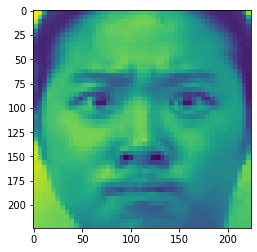

In [135]:
plt.imshow(imageio.imread('anger/S502_001_00000016.png'))

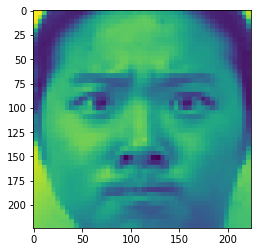

In [136]:
plt.imshow(imageio.imread('anger/S502_001_00000015.png'))

In [3]:
# just a list for looking for the picture in the fiel - can be ignored
list(enumerate(files))

[(0, 'img_25269.png'),
 (1, 'img_25144.png'),
 (2, 'img_9223.png'),
 (3, 'img_17256.png'),
 (4, 'img_10292.png'),
 (5, 'img_5720.png'),
 (6, 'img_16098.png'),
 (7, 'img_29548.png'),
 (8, 'img_28659.png'),
 (9, 'img_11155.png'),
 (10, 'img_33162.png'),
 (11, 'img_8390.png'),
 (12, 'img_17985.png'),
 (13, 'img_17332.png'),
 (14, 'img_3442.png'),
 (15, 'img_28509.png'),
 (16, 'img_3096.png'),
 (17, 'img_17676.png'),
 (18, 'img_1106.png'),
 (19, 'img_6002.png'),
 (20, 'img_17092.png'),
 (21, 'img_790.png'),
 (22, 'S999_001_00000016.png'),
 (23, 'img_26861.png'),
 (24, 'img_18423.png'),
 (25, 'img_14667.png'),
 (26, 'img_6299.png'),
 (27, 'img_30545.png'),
 (28, 'img_23196.png'),
 (29, 'img_1477.png'),
 (30, 'S502_001_00000016.png'),
 (31, 'img_21463.png'),
 (32, 'img_2654.png'),
 (33, 'img_6498.png'),
 (34, 'img_16605.png'),
 (35, 'img_31100.png'),
 (36, 'img_25897.png'),
 (37, 'img_4205.png'),
 (38, 'img_5076.png'),
 (39, 'img_15318.png'),
 (40, 'img_3142.png'),
 (41, 'img_18828.png'),
 (

## Functions 
- 2D array to 1D 
- 1D to Dict
- Dict to DF

In [4]:
def get_pixels(array):
    pixels = []
    for row in array:
        for pixel in row:
            pixels.append(pixel)
    return pixels

In [5]:
files_dict = {}
for i,f in enumerate(files):
    files_dict[f"picture_{i}"] = get_pixels(imageio.imread(f'anger/{f}'))

In [158]:
df = pd.DataFrame(files_dict)

In [159]:
df.head()

,picture_0,picture_1,picture_2,picture_3,picture_4,picture_5,picture_6,picture_7,picture_8,picture_9,...,picture_80,picture_81,picture_82,picture_83,picture_84,picture_85,picture_86,picture_87,picture_88,picture_89
0,87,34,57,175,0,237,181,255,12,89,...,49,19,249,255,232,104,42,216,223,94
1,87,34,57,175,0,237,181,255,12,89,...,49,19,249,255,232,104,42,216,223,94
2,87,34,57,175,0,237,181,255,12,89,...,49,19,249,255,232,104,42,216,223,94
3,87,34,57,175,0,237,181,255,12,89,...,49,19,249,255,232,104,42,216,223,94
4,87,34,57,175,0,237,181,255,12,89,...,49,19,249,255,232,104,42,216,223,94


## Functions
- checking duplicated 
- returning duplicated images as tuple 

In [154]:
def check_duplicate(pic1, pic2, threshold=50):
    
    d = abs(pic1 - pic2)
    filter_F = d.apply(lambda x:x<threshold)
    
    match_rate = filter_F.mean()
    if match_rate > 0.9:
        return True
    return False

In [156]:
dup_list = []
        
for i in range(0, len(df.columns)-2):
    for j in range(i+1, len(df.columns)-1):
        pic1 = df.iloc[:,i]
        pic2 = df.iloc[:,j] 
        if check_duplicate(pic1,pic2):
            dup_list.append((df.columns[i],df.columns[j]))

In [157]:
dup_list

[('picture_87', 'picture_30')]